[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mengyulin/CoastalEngineering/blob/master/Showcase/Chap_7/1_Fourier_analysis.ipynb)


# Fourier Analysis

## Introduction

This is a tutorial on some Fourier Analysis topics using SymPy and Python.

This notebook uses ``ipywidgets`` to create some interactive widgets. Refer to the [installation guide](https://ipywidgets.readthedocs.io/en/stable/user_install.html) if needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from ipywidgets import interact, fixed
from IPython.display import display

In [2]:
%matplotlib notebook
init_session()

IPython console for SymPy 1.8 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [3]:
plt.style.use(u"seaborn-notebook")
plt.rcParams["figure.figsize"] = 6, 4

## Fourier Series

### An example

Let's start with some examples of Fourier series approximation of
common periodic signals, namely:

- Square;
- Sawtooth;
- Triangle; and
- Circle (semicircle, actually).

In [4]:
from scipy.special import j1

def waves(N=10, f=1, wtype='square'):
    """Plot the Fourier series approximation for a signal
    
    N is the number of terms to consider in the approximation,
    f is the frequency of the signal, and wtype is the type of
    signal, the options are ('square','sawtooth','triangle','circ').
    """
    
    t = np.linspace(0, 2, 1000)
    x = np.zeros_like(t)
   
    for k in range(1, N+1):
        if wtype=='square':
            x = x + 4/np.pi*np.sin(2*np.pi*(2*k - 1)*f*t)/(2*k-1)
        if wtype=='sawtooth':
            x = x + 2*(-1)**(k+1)/np.pi*np.sin(2*np.pi*k*f*t)/k
        if wtype=='triangle':
            n = k - 1
            x = x + 8/np.pi**2*(-1)**n*np.sin(2*np.pi*(2*n + 1)*f*t)/(2*n +1)**2
        if wtype=='circ':
            n = k - 1
            if n == 0:
                x = x + 0.25*np.pi
            else:
                x = x + (-1)**n*j1(n*np.pi)/n*np.cos(2*np.pi*n*f*t)
    
    plt.subplots(figsize=(6,4))
    plt.plot(t, x, linewidth=2, color="#e41a1c")
    plt.ylim(-1.5, 1.5)

In [5]:
w = interact(waves,
             N=(1,400),
             f=(1.,10.),
             wtype=['square','sawtooth','triangle','circ'])

interactive(children=(IntSlider(value=10, description='N', max=400, min=1), FloatSlider(value=1.0, description…

## Fourier trigonometric series expansion using Sympy

### sympy.series.fourier.fourier_series(f, limits=None, finite=True)

Computes the Fourier trigonometric series expansion.

Fourier trigonometric series of $f(x)$ over the interval $(a,b)$ is defined as:

\begin{equation}
f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty \left[a_n\cos\left(\frac{2n\pi x}{L}\right) + b_n\sin\left(\frac{2n\pi x}{L}\right)\right]
\end{equation}

where

\begin{equation}
L = b-a
\end{equation}

\begin{equation}
a_0 = \frac{2}{L}\int_a^b f(x)dx
\end{equation}

\begin{equation}
a_n = \frac{2}{L}\int_a^b f(x)\cos\left(\frac{2n\pi x}{L} \right)dx
\end{equation}

\begin{equation}
b_n = \frac{2}{L}\int_a^b f(x)\sin\left(\frac{2n\pi x}{L} \right)dx
\end{equation}

### Examples

In the previous example, we hardcoded the representation of the signal.
This example take advantage of the function ``fourier_series`` that
returns the Fourier series for a given function. To get the approximated
version (with `n` terms) we can use the method ``.truncate(n)``.

#### Example 1

Computing the Fourier series of $f(x) = x^2$:

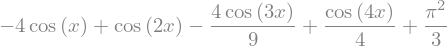

In [6]:
fun = x**2
approx_fun = fourier_series(fun, (x, -pi, pi))
approx_fun_t = approx_fun.truncate(n=5)
approx_fun_t

In [7]:
def fourier(fun, approx_fun, half_width=pi, n=5):
    """
    Plot the Fourier series approximation using Sympy
    
    Parameters
    ----------
    fun : Sympy expression
        Original function.
    approx_fun : Sympy FourierSeries
        Fourier Series representation of ``fun``.
    hald_width : Sympy "number"
        Half-period of the signal.
    n : integer
        Number of terms to consider.
    """
    fun_np = lambdify((x), fun, "numpy")
    approx_np = lambdify((x), approx_fun.truncate(n), "numpy")
    x_np = np.linspace(-float(half_width), float(half_width), 201)
    
    plt.subplots(figsize=(6,4))
    plt.plot(x_np, fun_np(x_np), color="#e41a1c", linewidth=2,
             label="Function")
    plt.plot(x_np, approx_np(x_np), color="black", linestyle="dashed",
             linewidth=2, label="Approximation")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [8]:
interact(fourier,
         fun=fixed(fun),
         approx_fun=fixed(approx_fun),
         half_width=fixed(1),
         n=(1, 50));

interactive(children=(IntSlider(value=5, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

#### Example 2

Compute the Fourier series of $f(x) = x$, and illustrates how truncating to the higher order gives better convergence.

In [29]:
f = x
s = fourier_series(f, (x, -pi, pi))
s1 = s.truncate(n = 3)
s2 = s.truncate(n = 5)
s3 = s.truncate(n = 7)
p = plot(f, s1, s2, s3, (x, -pi, pi), show=False, legend=True)

<IPython.core.display.Javascript object>


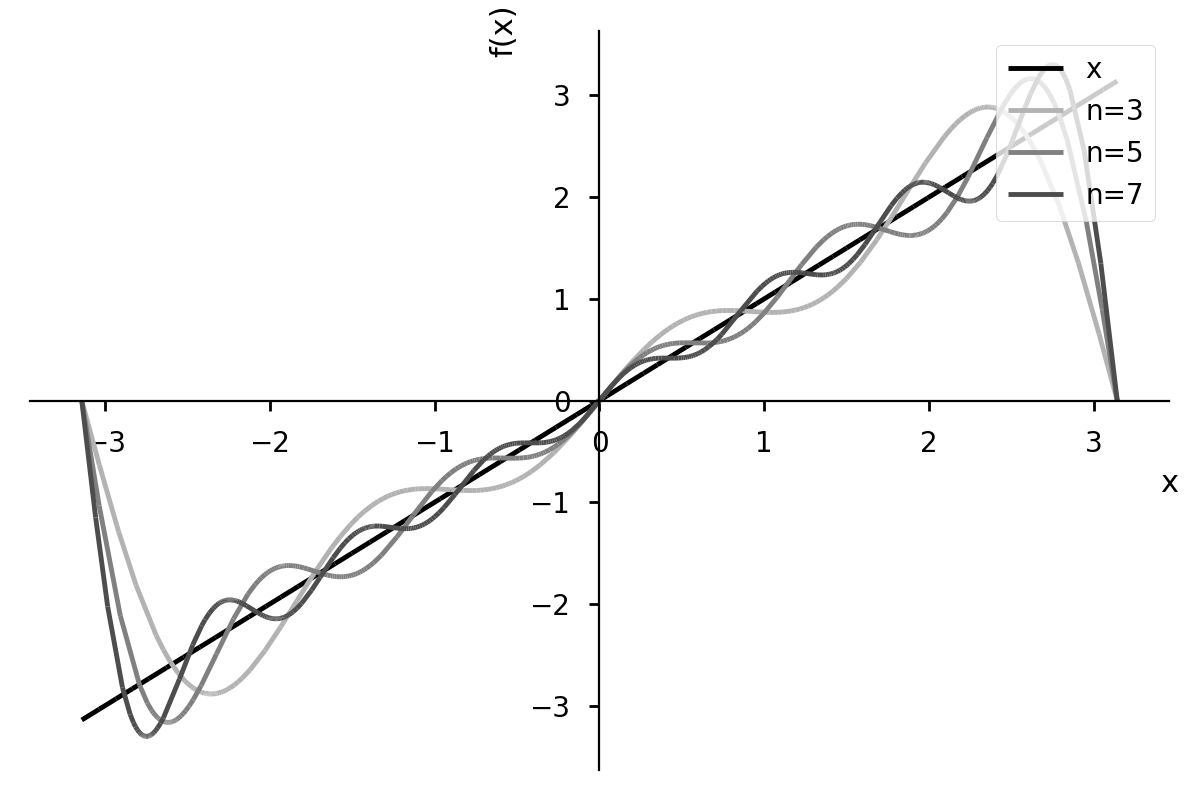

In [30]:
p[0].line_color = (0, 0, 0)
p[0].label = 'x'
p[1].line_color = (0.7, 0.7, 0.7)
p[1].label = 'n=3'
p[2].line_color = (0.5, 0.5, 0.5)
p[2].label = 'n=5'
p[3].line_color = (0.3, 0.3, 0.3)
p[3].label = 'n=7'
p.show()

## Fourier transforms

First, let's compute the Fourier Tranform of a Gaussian function.

In [11]:
f = exp(-x**2)
F = fourier_transform(f, x, y)
F

Let's compute the Fourier transform of a square function

In [31]:
y = symbols("y", positive=True)

<IPython.core.display.Javascript object>


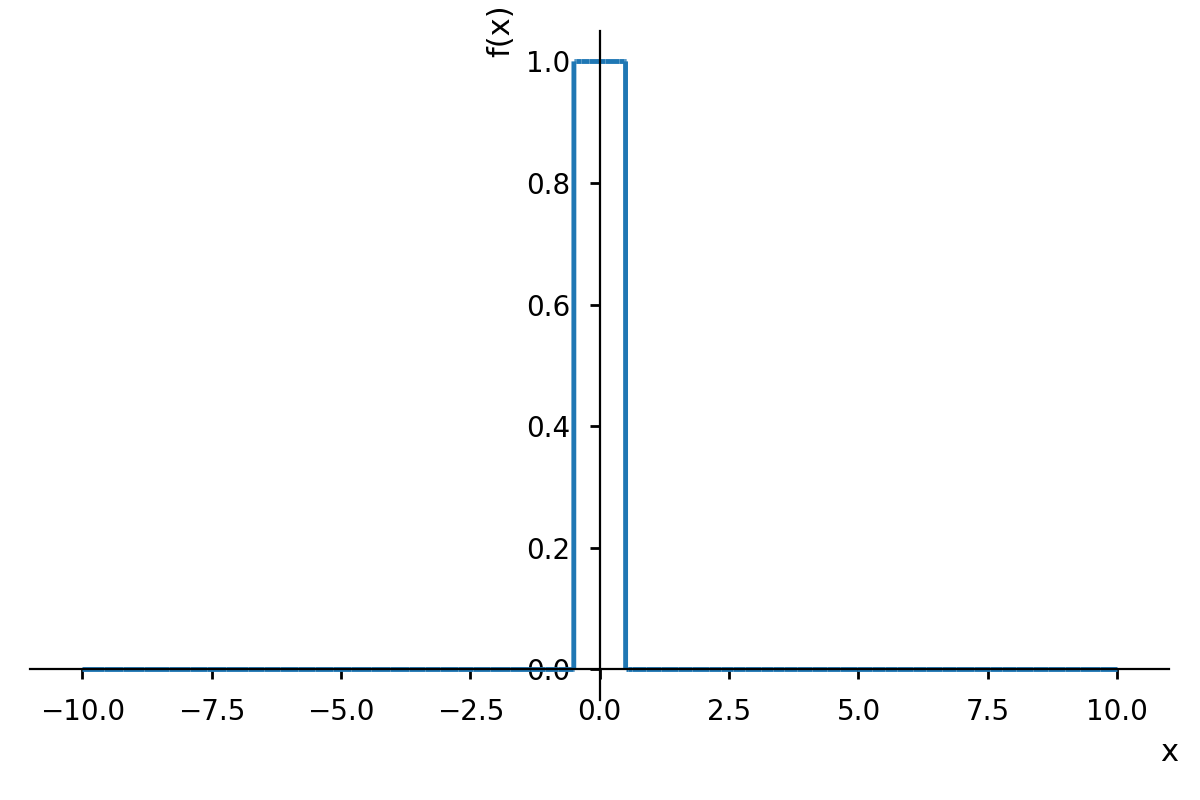

In [32]:
square = Piecewise((0, x<-S(1)/2), (0, x>S(1)/2), (1, True))
plot(square);

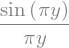

In [33]:
T_square = fourier_transform(square, x, y)
#T_square = simplify(T_square.rewrite(sin))
T_square

<IPython.core.display.Javascript object>


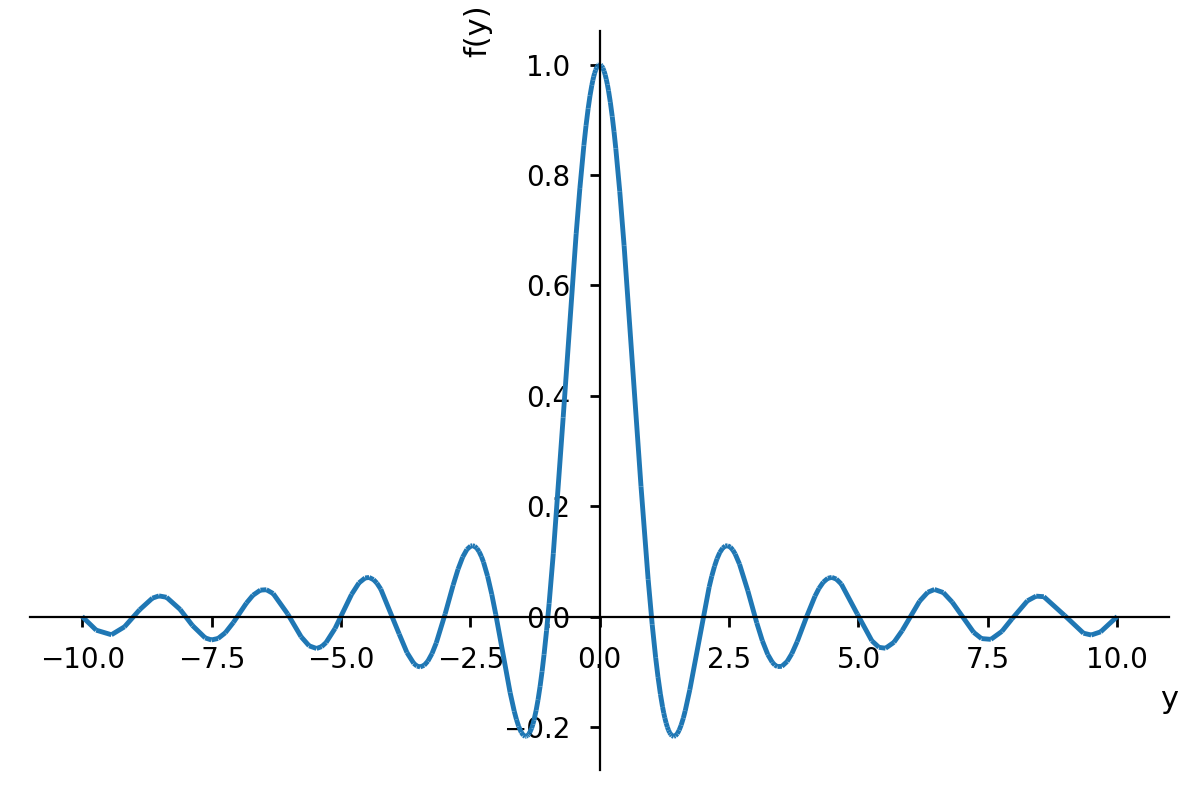

In [34]:
plot(T_square);

We can explicitly solve the last integral

In [35]:
y = symbols("y", nonzero=True)
FT = integrate(exp(-2*pi*I*x*y), (x, -S(1)/2, S(1)/2))

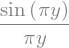

In [36]:
FT = simplify(FT.rewrite(sin))
FT

<IPython.core.display.Javascript object>


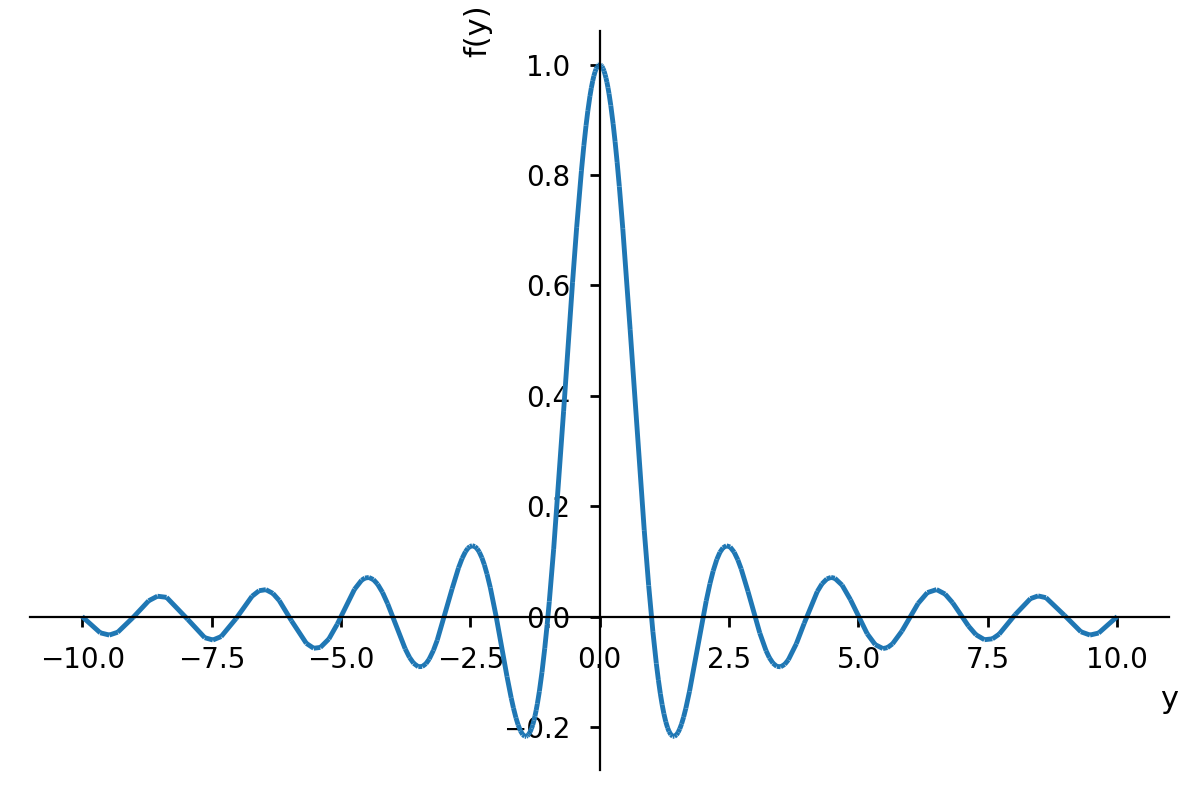

In [37]:
plot(FT);

## References

- Gael Varoquaux et al.[Scipy Lecture Notes](http://www.scipy-lectures.org/index.html), 2017.  DOI: http://doi.org/10.5281/zenodo.31521

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfae207e-f658-4236-9889-8ee708fe1d01' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>